**Importing the libraries:**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
import matplotlib.image as mp

Loading Data:

In [ ]:
(train_images,train_labels), (test_images,test_labels) = datasets.mnist.load_data()

In [ ]:
# size of training and testing data:
print('x_train:',train_images.shape)
print('y_train:',train_images.shape)
print('x_test:',test_images.shape)
print('y_test:',test_images.shape)

x_train: (60000, 28, 28)
y_train: (60000, 28, 28)
x_test: (10000, 28, 28)
y_test: (10000, 28, 28)


In [ ]:
# image in trainig data
pd.DataFrame(train_images[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dividing values(range=0 to 255)
train_images=train_images/255
test_images= test_images/255

Sequential model:

In [ ]:
model=models.Sequential()
# image flattening:
model.add(layers.Flatten(input_shape=(28,28,1)))  #grayscale=1\
# First hidden layer:
model.add(layers.Dense(32,activation="relu"))
# Second hidden layer:
model.add(layers.Dense(16,activation="relu"))
#Digits from 0 to 9 i.e. 10 classes
#Used softmax as probability distribution activation function
model.add(layers.Dense(10,activation="softmax"))

Model Compliation:

In [ ]:
# optimizer = adam
#Sparse_Categorical _crossentropy is used as a loss functions
#Saprse_categorical_crossentropy is used for classes that are mutual exclusive 
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()   #28*28 = 784

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


Model fitting:

In [ ]:
h1 = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3821 - accuracy: 0.8865 - val_loss: 0.1890 - val_accuracy: 0.9462
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816 - accuracy: 0.9478 - val_loss: 0.1583 - val_accuracy: 0.9509
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9584 - val_loss: 0.1335 - val_accuracy: 0.9605
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1197 - accuracy: 0.9649 - val_loss: 0.1231 - val_accuracy: 0.9629
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9689 - val_loss: 0.1177 - val_accuracy: 0.9653
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0940 - accuracy: 0.9720 - val_loss: 0.1157 - val_accuracy: 0.9672
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.1130 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


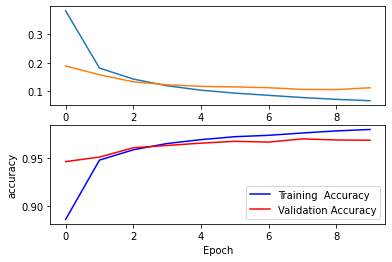

In [ ]:
import matplotlib.pyplot as plt
#Plotting the training and validation loss and accuracy
f,ax=plt.subplots(2,1) 
plt.xlabel('Epoch')
plt.ylabel('accuracy')
#Loss
ax[0].plot(h1.history['loss'], label='train loss')
ax[0].plot(h1.history['val_loss'], label='val loss')
plt.legend(['loss', 'val_loss'], loc='upper right')

#Accuracy
ax[1].plot(h1.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(h1.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.legend(loc='lower right')

In [ ]:
score = model.evaluate(test_images,test_labels)
print("Test score : ",score[0])
print("Test accuracy : ",score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9683
Test score :  0.1126708835363388
Test accuracy :  0.9682999849319458


In [ ]:
model_name = 'digit_recognition.h5'
# model saving:
model.save(model_name, save_format='h5')

In [ ]:
# Loading model:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
# Prediction of the model:
predictions_one_hot = loaded_model.predict([test_images])
# Prediction shape:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
# Extracting predictions with highest probabilites and detecting what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
# First prediction:
print(predictions[0])

7


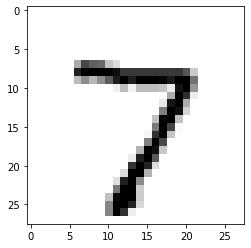

In [ ]:
# Visualixation of the output prediction:
plt.imshow(test_images[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()